### import libraries

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns


### inspect and arrange data

In [3]:
np.set_printoptions(suppress=True, precision = 2)

nba = pd.read_csv('./nba_games.csv')


# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

# print(nba_2010.head())
# print(nba_2014.head())
# seperate knicks and nets in 2010 df
knicks_pts  = nba_2010[nba_2010.fran_id == "Knicks"]
nets_pts = nba_2010[nba_2010.fran_id == "Nets"]
print(knicks_pts)

            game_id  year_id fran_id  opp_fran game_location  is_playoffs  \
21719  200910280MIA     2010  Knicks      Heat             A            0   
21725  200910300CHA     2010  Knicks   Hornets             A            0   
21728  200910310NYK     2010  Knicks    Sixers             H            0   
21734  200911020NYK     2010  Knicks  Pelicans             H            0   
21739  200911040NYK     2010  Knicks    Pacers             H            0   
...             ...      ...     ...       ...           ...          ...   
22102  201004070IND     2010  Knicks    Pacers             A            0   
22110  201004090ORL     2010  Knicks     Magic             A            0   
22116  201004110NYK     2010  Knicks      Heat             H            0   
22118  201004120NYK     2010  Knicks   Wizards             H            0   
22126  201004140TOR     2010  Knicks   Raptors             A            0   

       pts  opp_pts game_result  forecast  point_diff  
21719   93      115

In [4]:
# difference between teams average points
avgKnicks = np.mean(knicks_pts.pts)
avgnets = np.mean(nets_pts.pts)
diff_means_2010 = avgKnicks - avgnets
print(diff_means_2010)
# mean is not a good measure of association so futher tests must be made

9.731707317073173


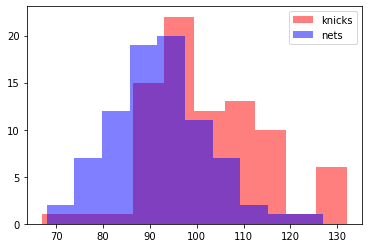

In [7]:
# create histogram to view assocation
plt.hist(knicks_pts.pts,color = "red" ,alpha =0.5, label='knicks')
plt.hist(nets_pts.pts,color = "blue" ,alpha =0.5,label='nets')
plt.legend()
plt.show()
# the fact that histograms are not overlaping completly shows there's asociaction betweenknicks and nets points

In [8]:
# compare 2010 with 2014
# seperate knicks and nets in 2014 df
knicks_pts14  = nba_2014[nba_2014.fran_id == "Knicks"]
nets_pts14 = nba_2014[nba_2014.fran_id == "Nets"]
print(knicks_pts14)

            game_id  year_id fran_id      opp_fran game_location  is_playoffs  \
23469  201310300NYK     2014  Knicks         Bucks             H            0   
23473  201310310CHI     2014  Knicks         Bulls             A            0   
23480  201311030NYK     2014  Knicks  Timberwolves             H            0   
23486  201311050NYK     2014  Knicks       Hornets             H            0   
23490  201311080CHA     2014  Knicks       Hornets             A            0   
...             ...      ...     ...           ...           ...          ...   
23849  201404060MIA     2014  Knicks          Heat             A            0   
23863  201404110TOR     2014  Knicks       Raptors             A            0   
23867  201404130NYK     2014  Knicks         Bulls             H            0   
23871  201404150BRK     2014  Knicks          Nets             A            0   
23875  201404160NYK     2014  Knicks       Raptors             H            0   

       pts  opp_pts game_re

In [9]:
# difference between teams average points
avgKnicks14 = np.mean(knicks_pts14.pts)
avgnets14 = np.mean(nets_pts14.pts)
diff_means_2014 = avgKnicks14 - avgnets14
print(diff_means_2014)
# the difference reduced between 2010 and 2014 

0.44706798131809933


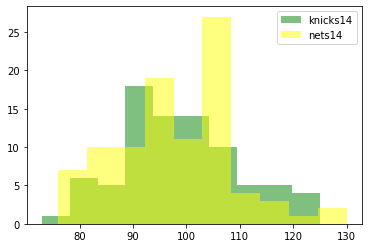

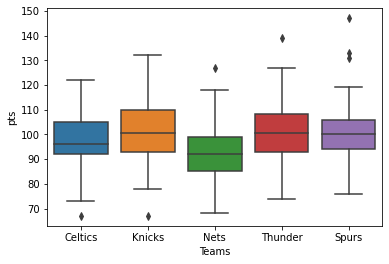

In [13]:
# create histogram to view assocation
plt.clf()
plt.hist(knicks_pts14.pts,color = "green" ,alpha =0.5,label='knicks14')
plt.hist(nets_pts14.pts,color = "yellow" ,alpha =0.5,label='nets14')
plt.legend()
plt.show()
# both plots are very similar meaning there's almost no relationship between knicks and nets scores in 2014 
# create boxplots for every team points in 2010 
plt.clf()
sns.boxplot(data = nba_2010, x ="fran_id",y= "pts")
plt.xlabel("Teams")
plt.show()

In [14]:
# make contegency results table for result and locations
location_result_freq = pd.crosstab(nba_2010.game_location,nba_2010.game_result)
print(location_result_freq)
# calculate proportions
location_result_proportions = location_result_freq / len(nba_2010)
print(location_result_proportions)

#  calculate expected and chi2 contigences
chi2,pural,dif,expected = chi2_contingency(location_result_proportions)
print(expected)
# the difference between the expected and contigency results suggets the existence of association between the variables
print(chi2)

# getting covariance between forecast and point difference in 2010
covmat1 = np.cov(nba_2010.forecast,nba_2010.point_diff)
print(covmat1)
cov1 = covmat1[0][1]
# the postive covaiance shows that the forecast was accurate most times 


game_result      L    W
game_location          
A              133   92
H              105  120
game_result           L         W
game_location                    
A              0.295556  0.204444
H              0.233333  0.266667
[[0.26 0.24]
 [0.26 0.24]]
3.529491041699698
[[  0.05   1.37]
 [  1.37 186.56]]


(0.44020887084680815, 9.410391573138826e-23)


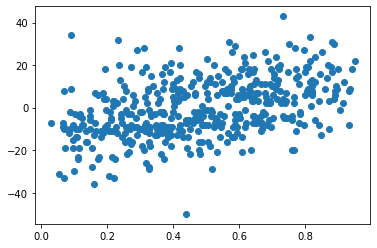

In [15]:
# calculating the correlation between the variables
corr = pearsonr(nba_2010.forecast,nba_2010.point_diff)
print(corr)
# the positive correlation suggest there's a positive relationships but as the number is closer to 0 the relationship is not strong '
# make a scatter plot for better vizualiation
plt.clf()
plt.scatter(x =nba_2010.forecast, y = nba_2010.point_diff)
plt.show()